In [ ]:
# ERA5 Global Reanalysis - This data set covers a massive amount of atmospheric and weather data, including precipitation and temperature data, which spans as far back as the mid-1900s 
# (Hersbach et al, 2020). The ERA5 Global Reanalysis was created by the European Center for Medium-Range Weather Forecasts, and is consistently updated with both new and changing atmospheric data 
# (ECMWF, n.d.). My specific dataset has been taken from the "Climate Data Store," which was created by the ECMWF and Copernicus Climate Change Service, where I have pulled data from the 
# "ERA5 Monthly Averaged Data on Single Levels from 1959 to Present" dataset (Climate Data Store, 2022). Because of the size of this data set, my research will center around the Northeast U.S., 
# with latitudes between 38 N and 48 N and longitudes between 80 W and 67.5 W. The data variable I will be focusing on is total precipitation, which will only account for land precipitation and 
# not include any ocean precipitation data.

# Hersbach, H, Bell, B, Berrisford, P, et al. (2020). The ERA5 Global Reanalysis. Q J R Meteorol Soc. 2020; 146: 1999– 2049. https://doi.org/10.1002/qj.3803

# ECMWF. (n.d.). ERA5. https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5

# Climate Data Store. (2022). ERA5 Monthly Averaged Data on Single Levels from 1959 to Present. ECMWF & Copernicus Climate Change Service. 
# https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview



In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [5]:
gribfile = '/home/jstiles4/clim680_dataset/ERA5_Reanalysis_Precip_dataset.grib'
dg = xr.open_dataset(gribfile,engine='cfgrib') #backend_kwargs={'filter_by_keys': {'stepType':'avgas','stepType':'avgad'}})
dg

<xarray.Dataset>
Dimensions:     (time: 252, latitude: 41, longitude: 53)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude   (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-09-26T11:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
dg_mean=dg.mean(dim='time')

In [7]:
dg_nino34_index = dg.mean(dim=['latitude','longitude'])
dg_nino34_index

<xarray.Dataset>
Dimensions:     (time: 252)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] 12:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 1990-01-01T06:00:00 ... 2010-12-01T06:0...
Data variables:
    tp          (time) float32 0.003479 0.003308 0.002174 ... 0.003679 0.00426

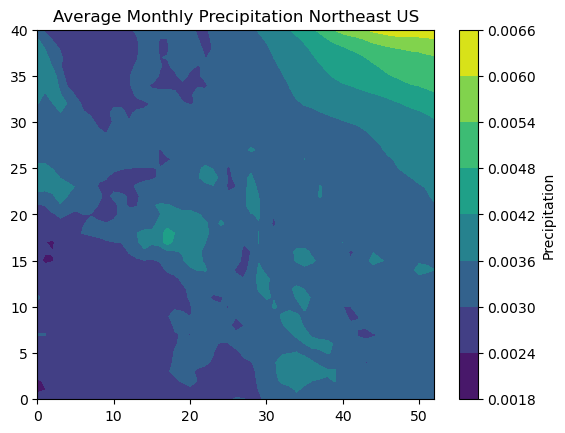

In [8]:
plt.contourf(dg_mean['tp'])
plt.title('Average Monthly Precipitation Northeast US')
plt.colorbar(label='Precipitation')

''

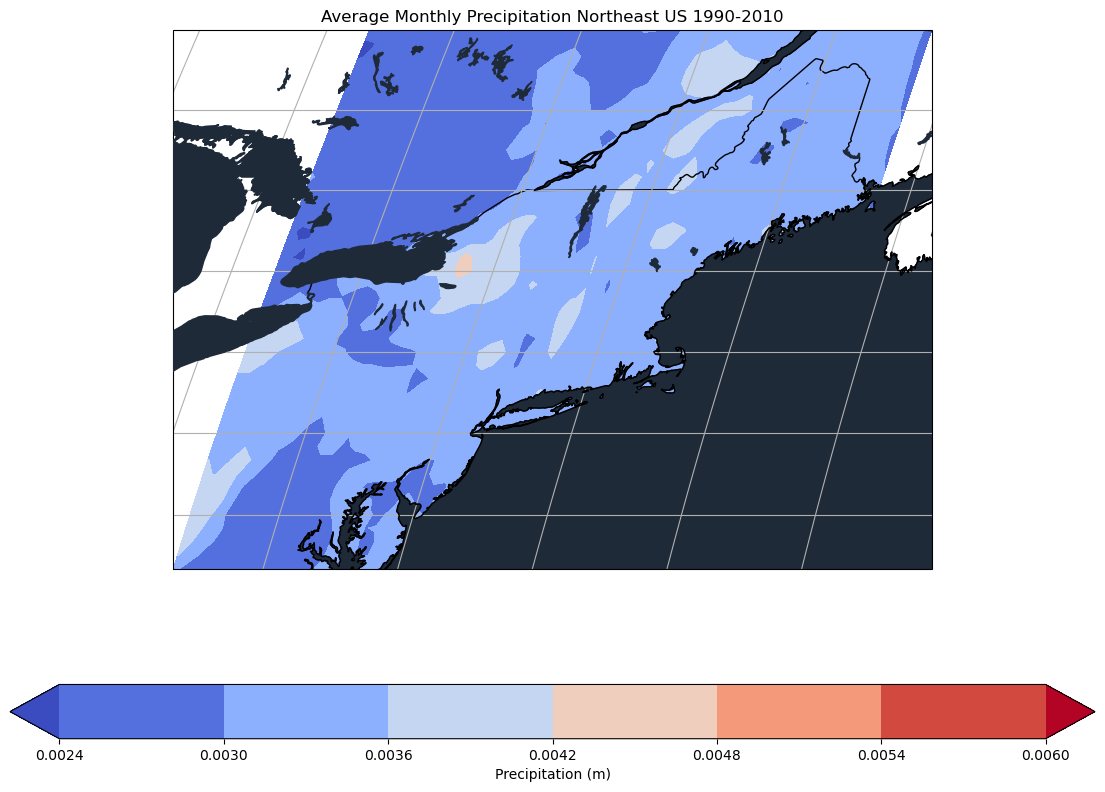

In [10]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.Robinson())

data=dg_mean['tp']
data, lons = add_cyclic_point(data, coord=dg['longitude'])

cs=ax.contourf(lons, dg['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

ax.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')
plt.gcf().set_size_inches(20, 10)

ax.gridlines()

cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Precipitation (m)')

plt.title('Average Monthly Precipitation Northeast US 1990-2010')
;